# Word embeddings

El algoritmo de word embeddings se basa en una red neuronal pre-alimentada con una capa oculta. Las representaciones vectoriales están dadas por los parámetros de la red neironal

In [1]:
%matplotlib inline
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

Definimos funciones para determinar índices numéricos en las palabras

In [2]:
def vocab():
    dicc = defaultdict()
    dicc.default_factory = lambda: len(dicc)
    return dicc

def BoW(corpus,vocab):
    for w in corpus:
        yield[vocab[w_i] for w_i in w.split()]

Definimos una función que nos permitirá visualizar los vectores:

In [3]:
def plot_words(Z,ids):
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

Definimos algunos ejemplos para el entrenamiento que estarán determinados por contextos de aparición de las palabras:

In [4]:
contextos = ['gato come', 'perro come', 'gato salta', 'perro salta', 'gato felino']

Convertimos los contextos en un vocabulario basado en índices númericos. Determinamos el tamaño del vocabulario y el número de dimensiones que deseamos en nuestros vectores de salida.

In [5]:
voc = vocab()
words = list(BoW(contextos, voc))

N, d = len(voc), 2

Generamos los parámetros de la red neuronal, que corresponden a dos matrices. La matriz $W$ de tamaño $N\times d$ y la matriz $U$ de tamaño $d\times N$.

La matriz $W$ representará a las palabras en versiones vectoriales. En este caso, estos vectores inicializan aleatoriamente:

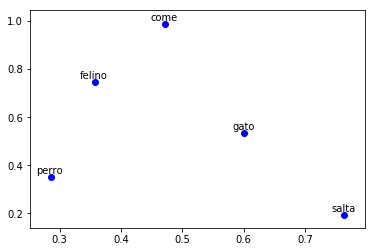

In [6]:
W = np.random.random((N, d))
U = np.random.random((d, N))

plot_words(W,voc.keys())

Ahora, definimos la función Softmax dada por $$ p(x|y) = \frac{exp\{ -x\cdot y \}}{\sum_k exp\{ -k \cdot y \}}$$

In [7]:
def softmax(x,y):
    return np.exp(-np.dot(x,y))/sum([np.exp(-np.dot(k,y)) for k in U.T])

Podemos tomar un ejemplo del entrenamiento y observar cuál es la probabilidad Softmax cuando no se han entrenado aún los vectores:

In [8]:
ex = ['gato','felino']

print softmax(W[voc[ex[0]]], U.T[voc[ex[1]]])

0.207005755368


Ahora, debemos entrenar la red neuronal. Para esto, evaluamos a partir de la función Softmax, y determinamos la función de error para correr el gradiente descendiente sobre la capa de salida. Si la entrada es la $j$-ésima palabra, entonces actualizamos la $i$-śima salidad como:

$$U_i^T \leftarrow U_i^T  - \eta [1-p(x|y)] W_j$$

Después actualizamos la capa de entrada a partir de retro propagar el error como:

$$W_j \leftarrow W_j - \eta EH$$

Donde $EH \in \mathbb{R}^d$ está dada por un vector cuyas entradas son_

$$EH = (EH_i) = \sum_j p(x|y_j) U_{i,j}$$

In [9]:
l = 1.0      #Rango de aprendizaje

for w in voc:
    p = softmax(W[voc[ex[0]]], U.T[voc[w]])    #Calculo de softmax
    
    #Se determina la funcion de error
    if w == ex[1]:
        err = 1-p
    else:
        err = 0-p
                
    #Se actualiza U
    U.T[voc[w]] -= l*err*W[voc[ex[0]]]

#Se actualiza W
W[voc[ex[0]]] -= l*U.sum(1)

Ahora, podemos ver cómo vambian las probabilidades del ejemplo:

In [10]:
print softmax(W[voc[ex[0]]], U.T[voc[ex[1]]])

0.559521523684


Aunque la variación no es mucha todavía (pues se requiere que se recorran todos los ejemplos y se itere el proceso varias veces) podemos ver que los vectores de la matriz W cambian:

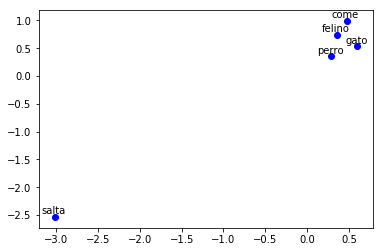

In [11]:
plot_words(W,voc.keys())

De esta forma, este proceso se debe adaptar para actualizar todos los vectores de la matriz $W$ con respecto a los ejemplos de entrenamiento.